<a href="https://colab.research.google.com/github/drypuddle1220/Sports_Betting_Analytics/blob/main/xboostmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: import the file final_df.csv and then make it into a datafram

import pandas as pd

# Assuming final_df.csv is in the current working directory
# or provide the full path if it's elsewhere.
try:
  df_merge_pot = pd.read_csv('/content/games_post_2022 (append).csv')

except FileNotFoundError:
  print("Error: final_df.csv not found. Please check the file path.")




In [3]:
# prompt: import the file final_df.csv and then make it into a datafram

import pandas as pd

# Assuming final_df.csv is in the current working directory
# or provide the full path if it's elsewhere.
try:
  df = pd.read_csv('final_df.csv')

except FileNotFoundError:
  print("Error: final_df.csv not found. Please check the file path.")

In [4]:
df

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,Total_Pts,injury_pot,avg_pace,agr_off
0,22019,1610612737,ATL,Atlanta Hawks,21900491,2019-12-30,ATL @ ORL,W,240,101,...,21,8.0,4,20,20,8.0,210.0,897.697449,45.595952,965.250000
1,22019,1610612737,ATL,Atlanta Hawks,21900477,2019-12-28,ATL @ CHI,L,239,81,...,24,8.0,5,19,16,-35.0,127.0,318.286035,39.351542,951.062500
2,22019,1610612737,ATL,Atlanta Hawks,21900469,2019-12-27,ATL vs. MIL,L,239,86,...,20,10.0,8,18,18,-26.0,146.0,0.000000,42.174058,893.422917
3,22019,1610612737,ATL,Atlanta Hawks,21900444,2019-12-23,ATL @ CLE,L,239,118,...,23,11.0,7,16,20,-3.0,233.0,1280.050975,53.901478,1017.227083
4,22019,1610612737,ATL,Atlanta Hawks,21900431,2019-12-21,ATL @ BKN,L,240,112,...,17,7.0,5,10,22,-10.0,214.0,1222.278910,59.075175,999.222917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,22017,1610612766,CHA,Charlotte Hornets,21700629,2018-01-13,CHA vs. OKC,L,242,91,...,16,3.0,7,14,15,-10.0,172.0,311.856137,47.824896,971.231250
5808,22017,1610612766,CHA,Charlotte Hornets,21700618,2018-01-12,CHA vs. UTA,W,241,99,...,17,8.0,2,12,19,11.0,209.0,929.446672,47.118406,955.564583
5809,22017,1610612766,CHA,Charlotte Hornets,21700603,2018-01-10,CHA vs. DAL,L,241,111,...,16,6.0,5,11,22,-4.0,218.0,0.000000,47.795089,1087.908333
5810,22017,1610612766,CHA,Charlotte Hornets,21700577,2018-01-05,CHA @ LAL,W,241,108,...,26,10.0,3,14,17,14.0,230.0,0.000000,40.475442,946.339583


In [5]:
df_merge_pot = df_merge_pot[['potential_y', 'GAME_ID']]
df_merge_pot

,potential_y,GAME_ID
0,5244.340204,21900491
1,5244.340204,21900477
2,5244.340204,21900469
3,5244.340204,21900444
4,5244.340204,21900431
...,...,...
5821,4343.847836,21700629
5822,4343.847836,21700618
5823,4343.847836,21700603
5824,4343.847836,21700577


In [6]:

# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [7]:
result_df = pd.DataFrame(columns=['GAME_ID', 'potential_y'])
game_count = {}

    # First pass: count occurrences of each GAME_ID
for _, row in df_merge_pot.iterrows():
    game_id = str(row['GAME_ID'])
    game_count[game_id] = game_count.get(game_id, 0) + 1
# Iterate through each row in original DataFrame
for _, row in df_merge_pot.iterrows():

    game_id = str(row['GAME_ID'])  # Convert to string to ensure consistent format
    potential = row['potential_y']

    if game_count[game_id] > 1:
      # Check if GAME_ID already exists in result_df
      if game_id in result_df['GAME_ID'].values:
          # Add potential to existing value
          mask = result_df['GAME_ID'] == game_id
          result_df.loc[mask, 'potential_y'] += potential
      else:
          # Add new row for new GAME_ID
          new_row = pd.DataFrame({
              'GAME_ID': [game_id],
              'potential_y': [potential]
          })
          result_df = pd.concat([result_df, new_row], ignore_index=True)


<ipython-input-7-312f343dacc9>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row], ignore_index=True)


In [8]:
df['GAME_ID'] = df['GAME_ID'].astype(int).astype(str)
result_df['GAME_ID'] = result_df['GAME_ID'].astype(float).astype(int).astype(str)
result_df

,GAME_ID,potential_y
0,21900491,10761.935518
1,21900477,10784.680311
2,21900469,10334.229586
3,21900444,10696.789841
4,21900431,12032.809749
...,...,...
2887,21800469,7690.320901
2888,21800405,7690.320901
2889,21800184,7690.320901
2890,21700892,7690.320901


In [9]:
df['PTS']

,PTS
0,101
1,81
2,86
3,118
4,112
...,...
5807,91
5808,99
5809,111
5810,108


In [10]:
df_2 = result_df.merge(df, on='GAME_ID', how='left')
df_2
df_2['agr_pot'] = df_2['potential_y'] - df_2['injury_pot']
df_2[['PTS', 'GAME_DATE']]

,PTS,GAME_DATE
0,101.0,2019-12-30
1,93.0,2019-12-30
2,81.0,2019-12-28
3,116.0,2019-12-28
4,86.0,2019-12-27
...,...,...
5777,113.0,2018-11-11
5778,98.0,2018-02-25
5779,114.0,2018-02-25
5780,107.0,2018-01-15


In [11]:
# prompt: make a dataframe after reading csv of exported_df.csv

import pandas as pd


exported_df = pd.read_csv('exported_df.csv')
exported_df.columns
exported_df = exported_df[['GAME_ID', 'avg_PTS_20_games',
       'avg_FGM_20_games', 'avg_FGA_20_games', 'avg_FG_PCT_20_games',
       'avg_FG3M_20_games', 'avg_FG3A_20_games', 'avg_FG3_PCT_20_games',
       'avg_FTM_20_games', 'avg_FTA_20_games', 'avg_FT_PCT_20_games',
       'avg_OREB_20_games', 'avg_DREB_20_games', 'avg_REB_20_games',
       'avg_AST_20_games', 'avg_STL_20_games', 'avg_BLK_20_games',
       'avg_TOV_20_games', 'avg_PF_20_games', 'avg_PLUS_MINUS_20_games',
       'games_past_7_days_team', 'games_to5', 'win_loss_ratio_20_games']]
exported_df['GAME_ID'] = exported_df['GAME_ID'].astype(float).astype(int).astype(str)
xg = df_2.merge(exported_df, on='GAME_ID', how='left')

In [12]:
xg = xg.drop_duplicates(subset=['GAME_ID', 'GAME_DATE', 'MATCHUP', 'TEAM_NAME'])

In [13]:
xg

,GAME_ID,potential_y,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,...,avg_REB_20_games,avg_AST_20_games,avg_STL_20_games,avg_BLK_20_games,avg_TOV_20_games,avg_PF_20_games,avg_PLUS_MINUS_20_games,games_past_7_days_team,games_to5,win_loss_ratio_20_games
0,21900491,10761.935518,22019.0,1.610613e+09,ATL,Atlanta Hawks,2019-12-30,ATL @ ORL,W,240.0,...,41.200000,23.600000,7.950000,4.750000,15.90,22.000000,-12.100000,0,N,0.100000
2,21900491,10761.935518,22019.0,1.610613e+09,ORL,Orlando Magic,2019-12-30,ORL vs. ATL,L,241.0,...,41.200000,23.600000,7.950000,4.750000,15.90,22.000000,-12.100000,0,N,0.100000
4,21900477,10784.680311,22019.0,1.610613e+09,ATL,Atlanta Hawks,2019-12-28,ATL @ CHI,L,239.0,...,41.100000,23.200000,8.100000,4.600000,15.85,22.150000,-11.400000,0,N,0.100000
6,21900477,10784.680311,22019.0,1.610613e+09,CHI,Chicago Bulls,2019-12-28,CHI vs. ATL,W,240.0,...,41.100000,23.200000,8.100000,4.600000,15.85,22.150000,-11.400000,0,N,0.100000
8,21900469,10334.229586,22019.0,1.610613e+09,ATL,Atlanta Hawks,2019-12-27,ATL vs. MIL,L,239.0,...,40.700000,23.150000,8.150000,4.700000,15.90,22.600000,-12.550000,0,N,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11562,21800184,7690.320901,22018.0,1.610613e+09,CHA,Charlotte Hornets,2018-11-11,CHA @ DET,W,240.0,...,45.650000,20.100000,7.200000,3.950000,13.75,23.550000,-0.230000,0,N,0.550000
11564,21700892,7690.320901,22017.0,1.610613e+09,DET,Detroit Pistons,2018-02-25,DET @ CHA,L,239.0,...,44.950000,24.400000,7.200000,4.600000,12.50,18.500000,-1.100000,0,N,0.350000
11566,21700892,7690.320901,22017.0,1.610613e+09,CHA,Charlotte Hornets,2018-02-25,CHA vs. DET,W,239.0,...,44.950000,24.400000,7.200000,4.600000,12.50,18.500000,-1.100000,0,N,0.350000
11568,21700638,7690.320901,22017.0,1.610613e+09,DET,Detroit Pistons,2018-01-15,DET vs. CHA,L,240.0,...,40.333333,22.666667,7.333333,4.166667,11.50,14.333333,-1.166667,0,N,0.333333


In [14]:

compressed_xg = xg.merge(xg, on = 'GAME_ID', how = 'left')

In [15]:
compressed_xg.shape
compressed_xg = compressed_xg.drop_duplicates(subset=['GAME_ID'])

In [16]:
columns_to_keep = [
    "GAME_ID", "potential_y_x", "SEASON_ID_x", "TEAM_ID_x", "TEAM_ABBREVIATION_x", "TEAM_NAME_x",
    "GAME_DATE_x", "MATCHUP_x", "PTS_x", "injury_pot_x", "avg_pace_x", "agr_off_x", "agr_pot_x",
    "avg_PTS_20_games_x", "avg_FGM_20_games_x", "avg_FGA_20_games_x", "avg_FG_PCT_20_games_x",
    "avg_FG3M_20_games_x", "avg_FG3A_20_games_x", "avg_FG3_PCT_20_games_x", "avg_FTM_20_games_x",
    "avg_FTA_20_games_x", "avg_FT_PCT_20_games_x", "avg_OREB_20_games_x", "avg_DREB_20_games_x",
    "avg_REB_20_games_x", "avg_AST_20_games_x", "avg_STL_20_games_x", "avg_BLK_20_games_x",
    "avg_TOV_20_games_x", "avg_PF_20_games_x", "avg_PLUS_MINUS_20_games_x",
    "games_past_7_days_team_x", "games_to5_x", "win_loss_ratio_20_games_x",
    "potential_y_y", "SEASON_ID_y", "TEAM_ID_y", "TEAM_ABBREVIATION_y", "TEAM_NAME_y",
    "GAME_DATE_y", "WL_y", "MIN_y", "PTS_y", "injury_pot_y", "avg_pace_y", "agr_off_y", "agr_pot_y",
    "avg_PTS_20_games_y", "avg_FGM_20_games_y", "avg_FGA_20_games_y", "avg_FG_PCT_20_games_y",
    "avg_FG3M_20_games_y", "avg_FG3A_20_games_y", "avg_FG3_PCT_20_games_y", "avg_FTM_20_games_y",
    "avg_FTA_20_games_y", "avg_FT_PCT_20_games_y", "avg_OREB_20_games_y", "avg_DREB_20_games_y",
    "avg_REB_20_games_y", "avg_AST_20_games_y", "avg_STL_20_games_y", "avg_BLK_20_games_y",
    "avg_TOV_20_games_y", "avg_PF_20_games_y", "avg_PLUS_MINUS_20_games_y",
    "games_past_7_days_team_y", "games_to5_y", "win_loss_ratio_20_games_y"
]

# Create new DataFrame with only the specified columns
new_df = compressed_xg[columns_to_keep]


In [17]:
new_df['tot_pts'] = new_df['PTS_x'] + new_df['PTS_y']

<ipython-input-17-e9c2d193b0b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tot_pts'] = new_df['PTS_x'] + new_df['PTS_y']


In [26]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()

# Fit the encoder to the 'MATCHUP' column and transform it
new_df['MATCHUP_encoded'] = le.fit_transform(new_df['MATCHUP_x'])
new_df['games_to5_x'] = le.fit_transform(new_df['games_to5_x'])
new_df['games_to5_y'] = le.fit_transform(new_df['games_to5_y'])

X = new_df[[ "potential_y_x",  "MATCHUP_encoded",  "avg_pace_x", "agr_off_x", "agr_pot_x",
    "avg_PTS_20_games_x", "avg_FGM_20_games_x", "avg_FGA_20_games_x", "avg_FG_PCT_20_games_x",
    "avg_FG3M_20_games_x", "avg_FG3A_20_games_x", "avg_FG3_PCT_20_games_x", "avg_FTM_20_games_x",
    "avg_FTA_20_games_x", "avg_FT_PCT_20_games_x", "avg_OREB_20_games_x", "avg_DREB_20_games_x",
    "avg_REB_20_games_x", "avg_AST_20_games_x", "avg_STL_20_games_x", "avg_BLK_20_games_x",
    "avg_TOV_20_games_x", "avg_PF_20_games_x", "avg_PLUS_MINUS_20_games_x", "games_to5_x", "win_loss_ratio_20_games_x",
    ]]
y = new_df['tot_pts']

X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X



<ipython-input-26-1632476633d9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['MATCHUP_encoded'] = le.fit_transform(new_df['MATCHUP_x'])
<ipython-input-26-1632476633d9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['games_to5_x'] = le.fit_transform(new_df['games_to5_x'])
<ipython-input-26-1632476633d9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000)

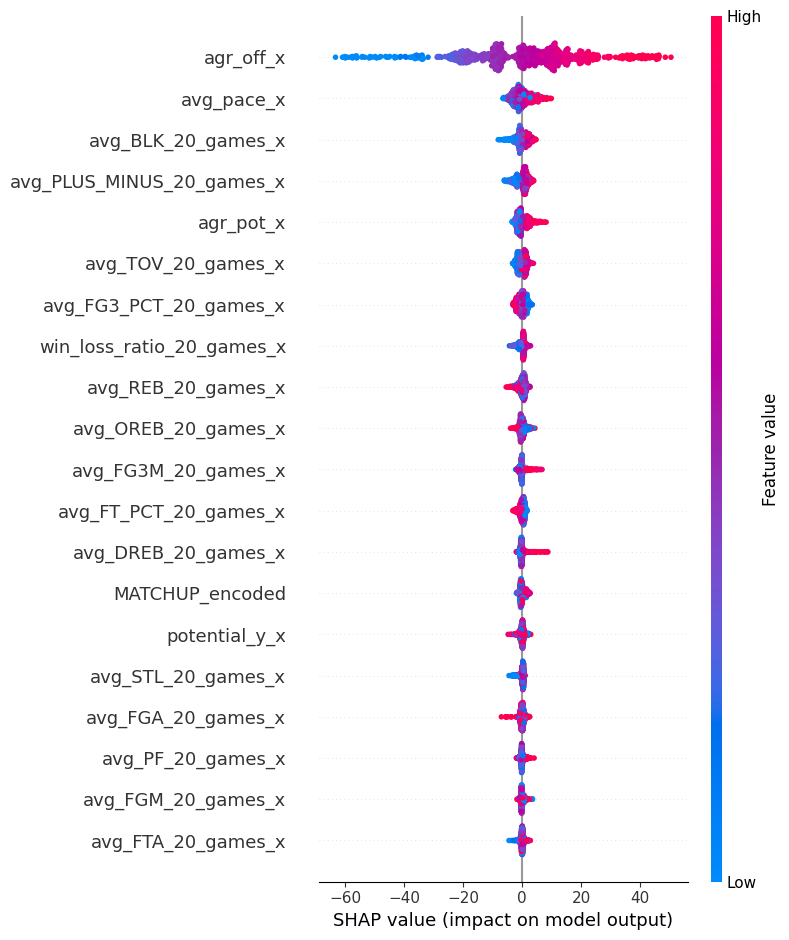

In [25]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test, max_display=20)


In [36]:


model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01, max_depth=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.4f}")

RMSE: 18.6875


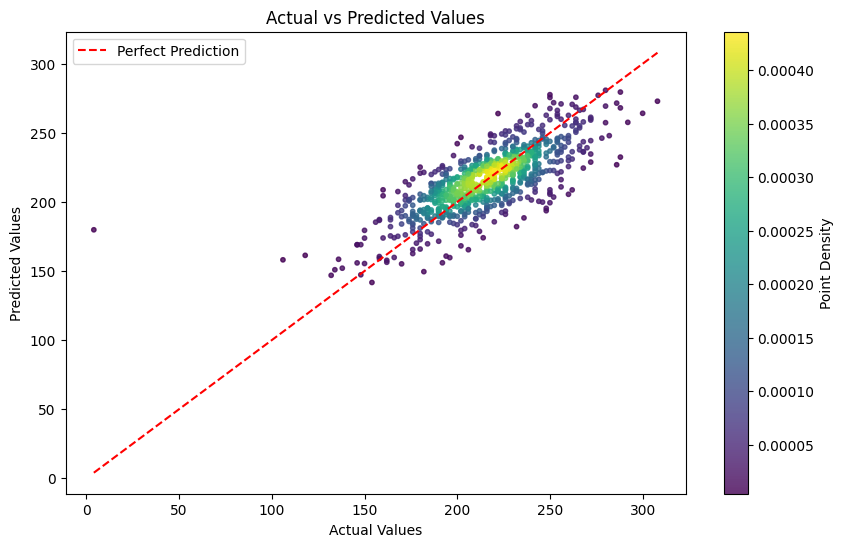

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde


# Calculate density for scatter plot
xy = np.vstack([y_test, y_pred])
density = gaussian_kde(xy)(xy)


plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test, y_pred, c=density, cmap='viridis', s=10, alpha=0.8)
plt.colorbar(scatter, label='Point Density')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


